In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import tensorflow
import keras
import shutil
from keras import models
from keras import layers
from keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.applications import VGG16

2024-11-28 23:15:53.274930: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
original_dataset_dir = 'kagglecatsanddogs_5340/PetImages/'

# uncomment '#' to create train, test and validation packages

base_dir = 'cats_and_dogs_small'
# os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')
# os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
# os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
# os.mkdir(test_dir)

# # train
train_cats_dir = os.path.join(train_dir, 'cats')
# os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
# os.mkdir(train_dogs_dir)

# # validation
validation_cats_dir = os.path.join(validation_dir, 'cats')
# os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
# os.mkdir(validation_dogs_dir)

# # test
test_cats_dir = os.path.join(test_dir, 'cats')
# os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')
# os.mkdir(test_dogs_dir)

# # data_train
# fnames = ['{}.jpg'.format(i) for i in range(1000)]
# for fname in fnames:
#     src = os.path.join(original_dataset_dir + 'Cat', fname)
#     dst = os.path.join(train_cats_dir, fname)
#     shutil.copyfile(src, dst)

In [3]:
# for fname in fnames:
#     src = os.path.join(original_dataset_dir + 'Dog', fname)
#     dst = os.path.join(train_dogs_dir, fname)
#     shutil.copyfile(src, dst)

# # data_validation
# fnames = ['{}.jpg'.format(i) for i in range(1000, 1500)]
# for fname in fnames:
#     src = os.path.join(original_dataset_dir + 'Cat', fname)
#     dst = os.path.join(validation_cats_dir, fname)
#     shutil.copyfile(src, dst)

# for fname in fnames:
#     src = os.path.join(original_dataset_dir + 'Dog', fname)
#     dst = os.path.join(validation_dogs_dir, fname)
#     shutil.copyfile(src, dst)

# # data_test
# fnames = ['{}.jpg'.format(i) for i in range(1500, 2000)]
# for fname in fnames:
#     src = os.path.join(original_dataset_dir + 'Cat', fname)
#     dst = os.path.join(test_cats_dir, fname)
#     shutil.copyfile(src, dst)

# for fname in fnames:
#     src = os.path.join(original_dataset_dir + 'Dog', fname)
#     dst = os.path.join(test_dogs_dir, fname)
#     shutil.copyfile(src, dst)

In [4]:
print('total training cat images: ', len(os.listdir(train_cats_dir)))

total training cat images:  1000


In [5]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(300, 300, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

/home/eugene/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 298, 298, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 149, 149, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 147, 147, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 73, 73, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 71, 71, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 35, 35, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 33, 33, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    16,777,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,019,073 (64.92 MB)

 Trainable params: 17,019,073 (64.92 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
model.compile(optimizer=optimizers.RMSprop(), loss='binary_crossentropy', metrics=['accuracy'])

In [7]:
train_datagen = ImageDataGenerator(rescale=1/255)
test_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(300, 300),
    batch_size=20,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(300, 300),
    batch_size=20,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [8]:
history = model.fit(train_generator, steps_per_epoch=100, epochs=30, validation_data=validation_generator, validation_steps=50)

/home/eugene/.local/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 131s 1s/step - accuracy: 0.4860 - loss: 0.9680 - val_accuracy: 0.5000 - val_loss: 0.6906
Epoch 2/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 745us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/30


2024-11-27 13:05:27.724939: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)
2024-11-27 13:05:27.780748: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 127s 1s/step - accuracy: 0.5538 - loss: 0.6969 - val_accuracy: 0.5930 - val_loss: 0.6763
Epoch 4/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 272us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/30


2024-11-27 13:07:34.984685: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 129s 1s/step - accuracy: 0.6085 - loss: 0.6602 - val_accuracy: 0.6230 - val_loss: 0.6404
Epoch 6/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 339us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 128s 1s/step - accuracy: 0.6483 - loss: 0.6224 - val_accuracy: 0.6340 - val_loss: 0.6324
Epoch 8/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/30


2024-11-27 13:11:51.459591: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 128s 1s/step - accuracy: 0.6848 - loss: 0.5937 - val_accuracy: 0.6440 - val_loss: 0.6101
Epoch 10/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 11/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 131s 1s/step - accuracy: 0.7409 - loss: 0.5393 - val_accuracy: 0.7110 - val_loss: 0.5703
Epoch 12/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 13/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 131s 1s/step - accuracy: 0.7583 - loss: 0.5157 - val_accuracy: 0.6850 - val_loss: 0.6454
Epoch 14/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 299us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 15/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 130s 1s/step - accuracy: 0.7836 - loss: 0.4530 - val_accuracy: 0.6340 - val_loss: 0.6375
Epoch 16/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 17/30


2024-11-27 13:20:32.074005: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 130s 1s/step - accuracy: 0.8173 - loss: 0.3962 - val_accuracy: 0.6830 - val_loss: 0.7394
Epoch 18/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 283us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 19/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 129s 1s/step - accuracy: 0.8755 - loss: 0.2810 - val_accuracy: 0.6810 - val_loss: 0.8425
Epoch 20/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 330us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 21/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 129s 1s/step - accuracy: 0.9193 - loss: 0.2070 - val_accuracy: 0.7010 - val_loss: 0.9358
Epoch 22/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 306us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 23/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 130s 1s/step - accuracy: 0.9681 - loss: 0.1029 - val_accuracy: 0.6880 - val_loss: 1.0769
Epoch 24/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 339us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 25/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 130s 1s/step - accuracy: 0.9910 - loss: 0.0426 - val_accuracy: 

In [9]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(300, 300),
    batch_size=20,
    class_mode='binary'
)

Found 1000 images belonging to 2 classes.


In [10]:
test_loss, test_acc = model.evaluate(test_generator)

50/50 ━━━━━━━━━━━━━━━━━━━━ 14s 285ms/step - accuracy: 0.6882 - loss: 2.2254


In [11]:
print(test_loss, test_acc)

2.2405660152435303 0.6899999976158142


In [14]:
epochs = np.arange(16)
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

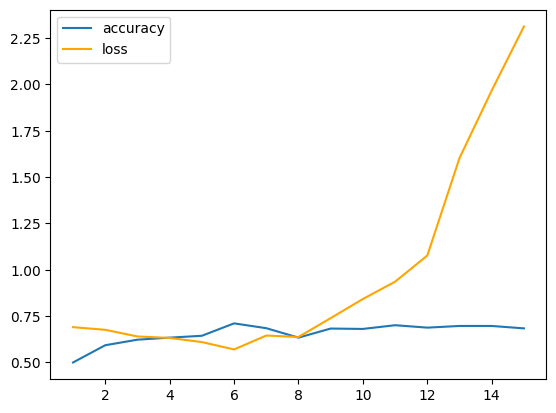

In [15]:
plt.plot(epochs[1:], val_acc, label='accuracy')
plt.plot(epochs[1:], val_loss, color='orange', label='loss')
plt.legend()

In [19]:
idx = list(range(0, 30, 2))
acc = np.array(history.history['accuracy'])
loss = np.array(history.history['loss'])

acc = acc[idx]
loss = loss[idx]

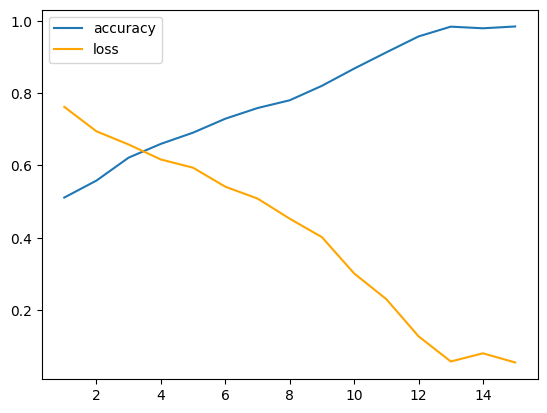

In [21]:
plt.plot(epochs[1:], acc, label='accuracy')
plt.plot(epochs[1:], loss, color='orange', label='loss')
plt.legend()

In [ ]:
plt.plot(epochs[1:], val_acc, label='val_accuracy')
plt.plot(epochs[1:], acc, label='accuracy', color='orange')
plt.legend()

In [ ]:
plt.plot(epochs[1:], val_loss, label='val_loss')
plt.plot(epochs[1:], loss, color='orange', label='loss')
plt.legend()

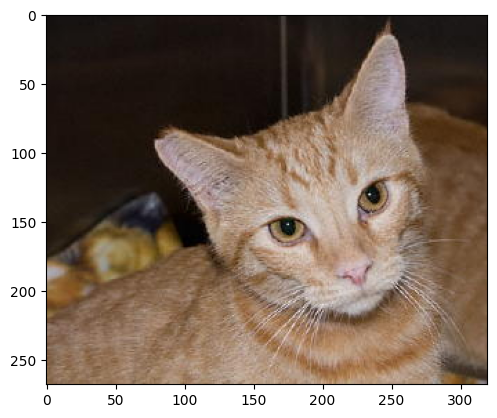

In [59]:
image = plt.imread('cats_and_dogs_small/train/cats/14.jpg')
plt.imshow(image[:, :, :])

In [82]:
datagen = ImageDataGenerator(rotation_range=180,
                            width_shift_range=0.2,
                            height_shift_range=0.2,
                            shear_range=0.2,
                            zoom_range=0.2,
                            horizontal_flip=True,
                            fill_mode='nearest')

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
img_path = fnames[3]
img = image.load_img(img_path, target_size=(300, 300))
x = image.img_to_array(img)
x = x.reshape(1, 300, 300, 3)

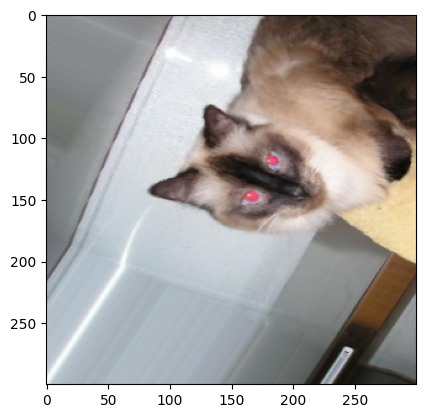

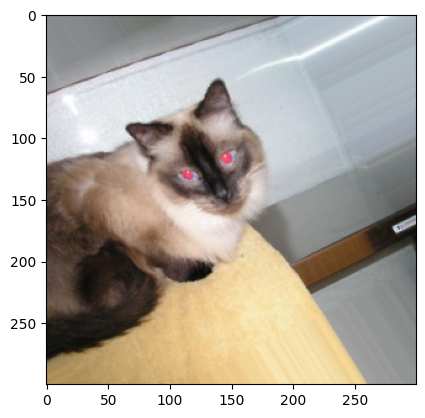

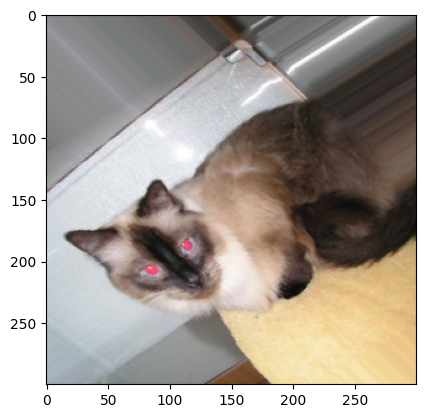

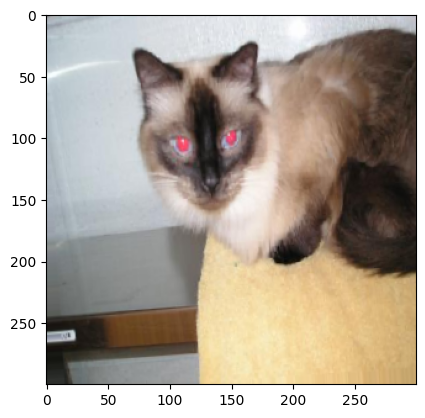

In [85]:
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

In [91]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

model.compile(optimizer=optimizers.RMSprop(), loss='binary_crossentropy', metrics=['accuracy'])

train_datagen = ImageDataGenerator(rescale=1/255,
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(100, 100),
    batch_size=20,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(100, 100),
    batch_size=20,
    class_mode='binary'
)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 98, 98, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 47, 47, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 21, 21, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,290,433 (4.92 MB)

 Trainable params: 1,290,433 (4.92 MB)

 Non-trainable params: 0 (0.00 B)

Found 2001 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [92]:
history = model.fit(train_generator, steps_per_epoch=100, epochs=70, validation_data=validation_generator, validation_steps=50)

Epoch 1/70
100/100 ━━━━━━━━━━━━━━━━━━━━ 17s 152ms/step - accuracy: 0.5052 - loss: 0.6949 - val_accuracy: 0.5540 - val_loss: 0.6856
Epoch 2/70
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 183us/step - accuracy: 0.5500 - loss: 0.6869 
Epoch 3/70
100/100 ━━━━━━━━━━━━━━━━━━━━ 14s 143ms/step - accuracy: 0.5338 - loss: 0.6947 - val_accuracy: 0.5290 - val_loss: 0.6914
Epoch 4/70
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 119us/step - accuracy: 0.4000 - loss: 0.7267 
Epoch 5/70
100/100 ━━━━━━━━━━━━━━━━━━━━ 22s 158ms/step - accuracy: 0.5325 - loss: 0.6884 - val_accuracy: 0.5930 - val_loss: 0.6698
Epoch 6/70
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 126us/step - accuracy: 0.6500 - loss: 0.6349
Epoch 7/70
100/100 ━━━━━━━━━━━━━━━━━━━━ 15s 147ms/step - accuracy: 0.5752 - loss: 0.6845 - val_accuracy: 0.6700 - val_loss: 0.6435
Epoch 8/70
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 133us/step - accuracy: 0.4500 - loss: 0.6911 
Epoch 9/70
100/100 ━━━━━━━━━━━━━━━━━━━━ 14s 144ms/step - accuracy: 0.5964 - loss: 0.6615 - val_accuracy: 0.5680 - val_los

2024-11-27 15:11:56.566090: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 15s 145ms/step - accuracy: 0.7303 - loss: 0.5722 - val_accuracy: 0.7870 - val_loss: 0.4520
Epoch 60/70
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 125us/step - accuracy: 0.6500 - loss: 0.6957 
Epoch 61/70
100/100 ━━━━━━━━━━━━━━━━━━━━ 15s 145ms/step - accuracy: 0.7360 - loss: 0.5300 - val_accuracy: 0.7740 - val_loss: 0.4693
Epoch 62/70
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 120us/step - accuracy: 0.7000 - loss: 0.5328
Epoch 63/70
100/100 ━━━━━━━━━━━━━━━━━━━━ 15s 145ms/step - accuracy: 0.7368 - loss: 0.5405 - val_accuracy: 0.7700 - val_loss: 0.4736
Epoch 64/70
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 123us/step - accuracy: 0.8000 - loss: 0.5509
Epoch 65/70
100/100 ━━━━━━━━━━━━━━━━━━━━ 15s 145ms/step - accuracy: 0.7695 - loss: 0.4982 - val_accuracy: 0.7850 - val_loss: 0.4773
Epoch 66/70
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 136us/step - accuracy: 0.8000 - loss: 0.4516
Epoch 67/70
100/100 ━━━━━━━━━━━━━━━━━━━━ 14s 144ms/step - accuracy: 0.7624 - loss: 0.5069 - val_accuracy: 0.7890 - val_loss: 0.

In [98]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(100, 100),
    batch_size=20,
    class_mode='binary'
)

test_loss, test_acc = model.evaluate(test_generator)
print(f'{test_loss=}, {test_acc=}')

Found 1000 images belonging to 2 classes.
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - accuracy: 0.7401 - loss: 0.5227
test_loss=0.5432476997375488, test_acc=0.7289999723434448


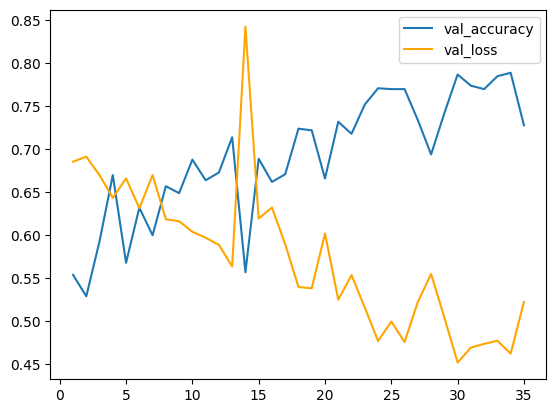

In [96]:
epochs = np.arange(36)
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

plt.plot(epochs[1:], val_acc, label='val_accuracy')
plt.plot(epochs[1:], val_loss, color='orange', label='val_loss')
plt.legend()

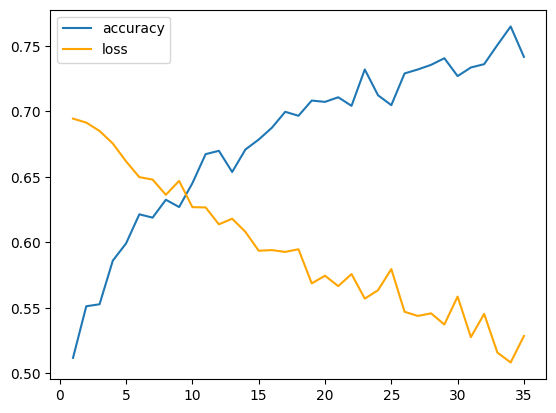

In [94]:
idx = list(range(0, 70, 2))
acc = np.array(history.history['accuracy'])
loss = np.array(history.history['loss'])

acc = acc[idx]
loss = loss[idx]

plt.plot(epochs[1:], acc, label='accuracy')
plt.plot(epochs[1:], loss, color='orange', label='loss')
plt.legend()

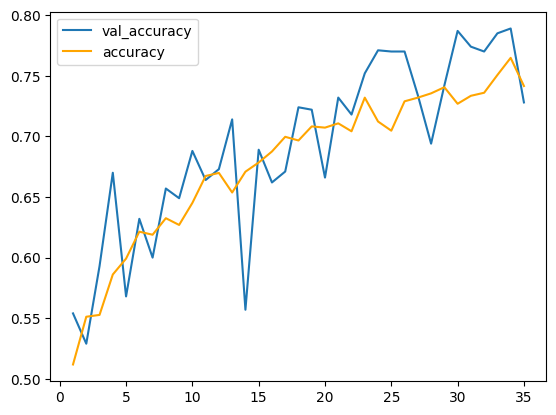

In [100]:
plt.plot(epochs[1:], val_acc, label='val_accuracy')
plt.plot(epochs[1:], acc, label='accuracy', color='orange')
plt.legend()

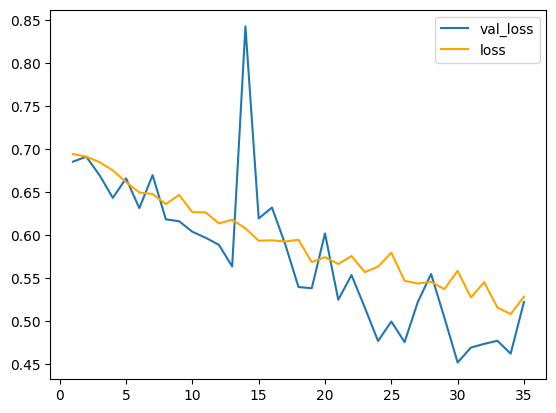

In [101]:
plt.plot(epochs[1:], val_loss, label='val_loss')
plt.plot(epochs[1:], loss, color='orange', label='loss')
plt.legend()

In [103]:
conv_bas = VGG16(weights='imagenet',
                include_top=False,
                input_shape=(100, 100, 3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 187s 3us/step
